# Introducción
Resolveremos un problema de regresion, donde el obejetivo es predecir el precio de cada casa. Mediante el uso de un data set que con 79 variables explicativas describen (casi) todos los aspectos de las casas residenciales en Ames, Iowa.

El data set lo encontramos en la página de kaggle.com en la sección de competencias, House Prices - Advanced Regression Techniques.

# Analisis de datos 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv') # Se usaría para la competencia, en este caso no lo usamos.

In [ ]:
df_train.info()

In [ ]:
# Para ver los valores faltantes:
valores_faltantes = df_train.isna().sum()
valores_faltantes.sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Selección de características númericas 

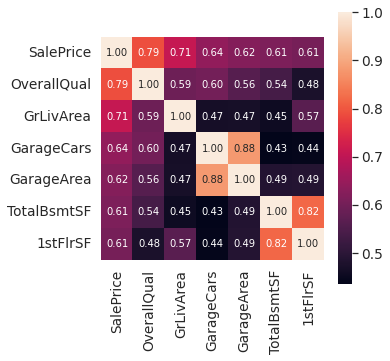

In [ ]:
import matplotlib.pyplot as plt

# saleprice correlation matrix
corrmat = df_train.corr()                                  # DataFrame
k = 7                                                      # número de variables que eligen para el mapa de calor
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # solo los usa para sacar índices de los k elementos de mayor valor de corr()
cm = np.corrcoef(df_train[cols].values.T)                  # corr() de df_train[cols].values.T, (7,1460)
sns.set(font_scale=1.25)
plt.subplots(figsize=(5,5))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# O directamente
corrmat.nlargest(10, 'SalePrice')['SalePrice'] # corrmat.nlargest(20, 'SalePrice') es un DataFrame

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [ ]:
# Columnas seleccionadas, las que tienen mayor valor (coeficiente de correlación de Pearson), en este caso solo usamos 9.
num_columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
              'TotRmsAbvGrd','YearBuilt']

## Selección de características categóricas

In [ ]:
cat_df = df_train.select_dtypes(include='O')
cat_df.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
cat_df.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
cat_columns = cat_df.columns.to_list()
cat_columns

In [ ]:
df_train.Neighborhood.value_counts()

In [ ]:
Vecinos_Precios = df_train.groupby(['Neighborhood']).sum()['SalePrice'] # Series
Vecinos_Precios

Neighborhood
Blmngtn     3312805
Blueste      275000
BrDale      1671900
BrkSide     7240375
ClearCr     5951832
CollgCr    29694866
Crawfor    10741861
Edwards    12821970
Gilbert    15235506
IDOTRR      3704580
MeadowV     1675800
Mitchel     7657236
NAmes      32815593
NPkVill     1284250
NWAmes     13800655
NoRidge    13747108
NridgHt    24352838
OldTown    14489459
SWISU       3564784
Sawyer     10122692
SawyerW    11006792
Somerst    19382666
StoneBr     7762475
Timber      9205403
Veenker     2626500
Name: SalePrice, dtype: int64

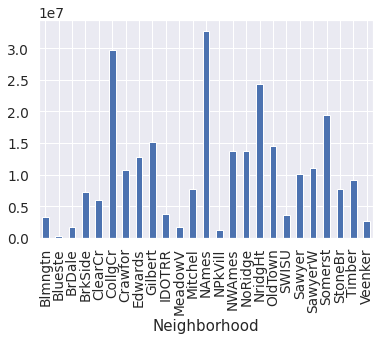

In [ ]:
Vecinos_Precios.plot(kind='bar')

In [ ]:
Zonas_Precios = df_train.groupby(['MSZoning']).sum()['SalePrice']
Zonas_Precios

MSZoning
C (all)       745280
FV          13910914
RH           2104934
RL         219846749
RM          27537069
Name: SalePrice, dtype: int64

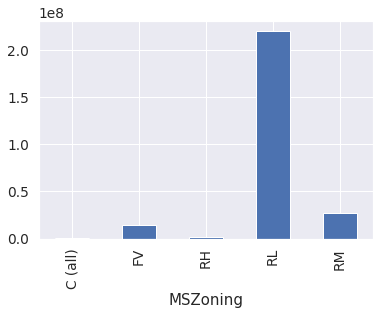

In [ ]:
Zonas_Precios.plot(kind='bar')

Tendria que seguir el analizis. Por ahora me quedo con estas dos caracteristicas.

In [ ]:
# Por lo tanto:
cat_columns = ['Neighborhood','MSZoning']

# Preprocesado de datos - Pipeline - Modelo

In [ ]:
X = df_train[num_columns + cat_columns + ['GarageCond']].copy() # Agrego GarageCond para imputar valores ahí.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   GarageCars    1460 non-null   int64 
 3   GarageArea    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   TotRmsAbvGrd  1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   Neighborhood  1460 non-null   object
 10  MSZoning      1460 non-null   object
 11  GarageCond    1379 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


In [ ]:
y = df_train.SalePrice.copy()
y.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [ ]:
X[cat_columns + ['GarageCond']].describe()

,Neighborhood,MSZoning,GarageCond
count,1460,1460,1379
unique,25,5,5
top,NAmes,RL,TA
freq,225,1151,1326


In [ ]:
# Imputo de forma casera:
X.GarageCond.isna().sum() # 81
X.GarageCond = X.GarageCond.fillna('TA')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   GarageCars    1460 non-null   int64 
 3   GarageArea    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   TotRmsAbvGrd  1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   Neighborhood  1460 non-null   object
 10  MSZoning      1460 non-null   object
 11  GarageCond    1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Separo los train y los test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

## Modelo y búsqueda de hiperparámetros

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

In [ ]:
num_columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
              'TotRmsAbvGrd','YearBuilt']
numeric_transformer = StandardScaler()

In [ ]:
cat_columns = X.select_dtypes(include='O').columns.to_list()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
cat_columns

['Neighborhood', 'MSZoning', 'GarageCond']

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_columns),
                                                ('cat', categorical_transformer, cat_columns)])

In [ ]:
pipe = Pipeline([('preprocessor', preprocessor),('classifier',XGBRegressor(n_jobs=-1))])

param_grid = [{'classifier__max_depth':[1,2,3,4,5,6,7,8,9],'classifier__learning_rate':[0.1,0.2,0.3],
               "classifier__n_estimators": [20,30,40,50,60,70,80,100,150]}]

In [ ]:
# scoring='neg_mean_absolute_error' mi metrica es el negativo error absoluto medio
model = GridSearchCV(pipe,param_grid,scoring='neg_mean_absolute_error', cv=3,)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print("Puntuación del conjunto de pruebas: {:.2f}".format(model.score(X_test, y_test))) # y_test.squeeze()
print("Best parameters: {}".format(model.best_params_))
print("Mejor puntaje de validación cruzada: {:.2f}".format(model.best_score_))

Puntuación del conjunto de pruebas: -15488.79
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 100}
Mejor puntaje de validación cruzada: -19532.09


In [ ]:
y_pred = model.predict(X_test)
len(y_pred)

146

In [ ]:
len(y_test)

146

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error

In [ ]:
# Error cuadrático medio
mean_squared_error(y_test,y_pred,squared=False)

24824.372540263455

In [ ]:
# Error porcentual medio absoluto
mean_absolute_percentage_error(y_test,y_pred)

0.08565076051358718

In [ ]:
# La puntuación R², el coeficiente de determinación
r2_score(y_test,y_pred)

0.9103260864649714

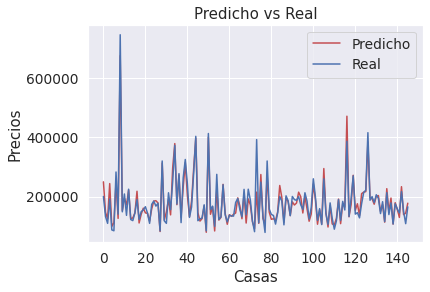

In [ ]:
x=[x for x in range(len(y_test))]
fig,ax = plt.subplots()
ax.plot(x,y_pred,'r')
ax.plot(x,y_test,'b')
ax.set(title='Predicho vs Real', ylabel='Precios', xlabel='Casas')
ax.legend(("Predicho","Real"),loc="upper right")